In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

### TP1: Actividad 3

3) A fin de decidir cuántos mostradores de servicio se necesitarán en tiendas que serán construidas en el futuro, una cadena de supermercados quiso obtener información acerca del tiempo (en minutos) requerido para atender a los clientes. Se registró la duración de 60 casos:

3.6	1.9	2.1	0.3	0.8	0.2	1.0	1.4	1.8	1.6
1.1	1.8	0.3	1.1	0.5	1.2	0.6	1.1	0.8	1.7
1.4	0.2	1.3	3.1	0.4	2.3	1.8	4.5	0.9	0.7
0.6	2.8	2.5	1.1	0.4	1.2	0.4	1.3	0.8	1.3
1.1	1.2	0.8	1.0	0.9	0.7	3.1	1.7	1.1	2.2
1.6	1.9	5.2	0.5	1.8	0.3	1.1	0.6	0.7	0.6

    a)	¿Cuál es la variable a analizar? ¿Es cuantitativa o cualitativa?
    b)	Organizarlos de la manera que le resulte más conveniente (de forma simple o en intervalos) y justificar la organización elegida.
    c)	Calcule los valores de posición y dispersión. Cuáles de estos valores tomará como represntativos? justifique
    d)	Representar gráficamente las frecuencias anteriores mediante un histograma y un polígono de frecuencias.
    e)	Construir las frecuencias acumuladas crecientes, y graficarlas mediante una ojiva.
    f)	Calcule los cuartiles, e indique qué información le proporciona.
    g)	¿Qué proporción de los tiempos de servicio es menor a un minuto?


In [6]:
X_muestra = np.array([3.6, 1.9, 2.1, 0.3, 0.8, 0.2, 1.0, 1.4, 1.8, 1.6, 1.1, 1.8, 0.3, 1.1, 0.5, 1.2, 0.6, 1.1, 0.8, 1.7, 1.4, 0.2, 1.3, 3.1, 0.4, 2.3, 1.8, 4.5, 0.9, 0.7, 0.6, 2.8, 2.5, 1.1, 0.4, 1.2, 0.4, 1.3, 0.8, 1.3, 1.1, 1.2, 0.8, 1.0, 0.9, 0.7, 3.1, 1.7, 1.1, 2.2, 1.6, 1.9, 5.2, 0.5, 1.8, 0.3, 1.1, 0.6, 0.7, 0.6])
X_muestra = np.sort(X_muestra, axis=None)
n = X_muestra.size

print("Muestra 1: ", X_muestra)
print("\nTotal muestra 1: ", n)
print("\nMenor muestra 1: ", np.min(X_muestra))
print("Mayor muestra 1: ", np.max(X_muestra))

Muestra 1:  [0.2 0.2 0.3 0.3 0.3 0.4 0.4 0.4 0.5 0.5 0.6 0.6 0.6 0.6 0.7 0.7 0.7 0.8
 0.8 0.8 0.8 0.9 0.9 1.  1.  1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.2 1.2 1.2 1.3
 1.3 1.3 1.4 1.4 1.6 1.6 1.7 1.7 1.8 1.8 1.8 1.8 1.9 1.9 2.1 2.2 2.3 2.5
 2.8 3.1 3.1 3.6 4.5 5.2]

Total muestra 1:  60

Menor muestra 1:  0.2
Mayor muestra 1:  5.2


In [14]:
# Describe data (Quartiles, min, max, media, count)

data = pd.Series(X_muestra)
data.describe()

count    60.000000
mean      1.366667
std       1.002652
min       0.200000
25%       0.700000
50%       1.100000
75%       1.800000
max       5.200000
dtype: float64

In [7]:
# b) Tabla frecuencias
# Muestra:

R = np.max(X_muestra) - np.min(X_muestra)
K = np.round(1 + 3.322 * np.log10(X_muestra.size))
A = (R / K) 

print("Rango: ", R)
print("Intervalo: ", K)
print("Amplitud: ", A)

Rango:  5.0
Intervalo:  7.0
Amplitud:  0.7142857142857143


In [8]:
intervalo = np.array([0.2,1,1.8,2.6,3.4,4.2,5,5.8])
frec, bins = np.histogram(X_muestra, bins = intervalo) # Frecuencia definida por numpy
print("Frecuencia: ", frec)
print("Intervalo: ", bins)

frecrel = frec / np.sum(X_muestra.size)
print("Frecuencia relativa: ", frecrel)

frecrelporc = frecrel * 100
print("Frecuencia relativa: ", frecrelporc)

Frecuencia:  [23 21 10  3  1  1  1]
Intervalo:  [0.2 1.  1.8 2.6 3.4 4.2 5.  5.8]
Frecuencia relativa:  [0.38333333 0.35       0.16666667 0.05       0.01666667 0.01666667
 0.01666667]
Frecuencia relativa:  [38.33333333 35.         16.66666667  5.          1.66666667  1.66666667
  1.66666667]


In [9]:
# c) 
# Media mediana y moda
# Muestra 

media = (np.sum(X_muestra) / np.sum(frec))
print("Media: ", media)

print("Mediana: ", np.median(X_muestra))

moda = st.mode(X_muestra)
print("Moda: ", moda)

Media:  1.3666666666666665
Mediana:  1.1
Moda:  ModeResult(mode=array([1.1]), count=array([7]))


In [10]:
# Valores de dispercion
dm = np.sum(np.abs(X_muestra - media)) / X_muestra.size # la suma del valor absouluto menos el promedio dividido entre el tamaño de muestra
print("\nDesviacion media: ", dm)

p = np.sum(X_muestra) / X_muestra.size # Promedio
print("\nPromedio: ", p)

S = np.sum(np.square(X_muestra - p)) / X_muestra.size # Varianza
print("\nVarianza: ", S)

r = np.sqrt(S) # Desvio estandar
print("\nDesvio estandar: ", r)

coeficientevar = (r / media) * 100
print("\nCoeficiente de variacion: ", coeficientevar)


Desviacion media:  0.7244444444444444

Promedio:  1.3666666666666665

Varianza:  0.9885555555555556

Desvio estandar:  0.9942613115049562

Coeficiente de variacion:  72.75082767109437


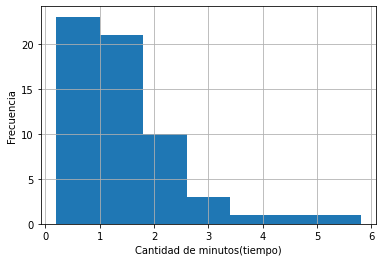

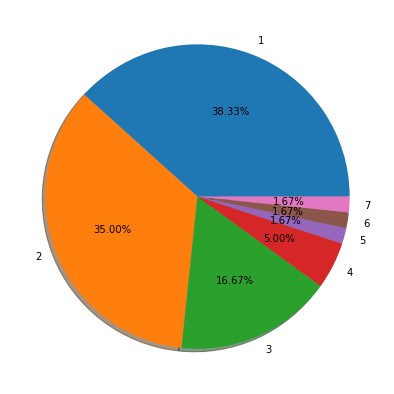

In [11]:
# d)

# Muestra
plt.hist(X_muestra, bins=intervalo)
plt.grid(True)
plt.xlabel("Cantidad de minutos(tiempo)")
plt.ylabel("Frecuencia")

# Pie de frecuencias
fig, ax = plt.subplots(figsize=(7,7))
ax.pie(frec, labels=[1, 2, 3, 4, 5, 6, 7], autopct='%.2f%%',shadow=True, labeldistance=1.1)

plt.show()

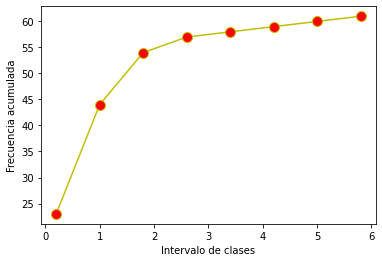

In [12]:
# e)
# Ojiva

y = np.array([23, 44, 54, 57, 58, 59, 60, 61]) # Frecuencia acumulada

plt.plot(intervalo, y, c='y', marker='o', ms=10, mfc='red')
plt.xlabel('Intervalo de clases')
plt.ylabel('Frecuencia acumulada')

#plt.savefig('Actividad 3 Ojiva (Muestra).png')
plt.show()

In [19]:
# f)
# Muestra

Q3 = 3 * np.sum(frec) / 4
print("Posicion Q3: ", Q3)

Q2 = 2 * np.sum(frec) / 4
print("Posicion Q2: ", Q2)

Q1 = 1 * np.sum(frec) / 4
print("Posicion Q1: ", Q1)

print(np.percentile(X_muestra, 75))
print(np.percentile(X_muestra, 50))
print(np.percentile(X_muestra, 25))

Posicion Q3:  45.0
Posicion Q2:  30.0
Posicion Q1:  15.0
1.8
1.1
0.7


In [24]:
# Percentiles 

print(np.percentile(X_muestra, [0, 10, 20, 30, 40, 50, 60, 70 ,80, 90, 100]))

[0.2  0.4  0.6  0.8  1.   1.1  1.3  1.63 1.82 2.53 5.2 ]
